In [56]:
from glob import glob

import numpy as np
import matplotlib.pyplot as plt

from src.data import parse_subject

In [57]:
neg_subjects = [
    parse_subject(filename)
    for filename in glob(f"data/training_t2/TRAINING_DATA/*/neg/*.xml", recursive=True)
]
pos_subjects = [
    parse_subject(filename)
    for filename in glob(f"data/training_t2/TRAINING_DATA/*/pos/*.xml", recursive=True)
]
all_subjects = neg_subjects + pos_subjects

In [58]:
print("# negative subjects:", len(neg_subjects))
print("# positive subjects:", len(pos_subjects))
print("# total subjects:", len(all_subjects))
print()
print("# negative posts:", sum(len(subject.posts) for subject in neg_subjects))
print("# positive posts:", sum(len(subject.posts) for subject in pos_subjects))
print("# total posts:", sum(len(subject.posts) for subject in all_subjects))
print()
print("# posts without title:", len([post for subject in all_subjects for post in subject.posts if len(post.title) == 0]))
print("# posts without text:", len([post for subject in all_subjects for post in subject.posts if len(post.text) == 0]))
print("# posts without title or text:", len([post for subject in all_subjects for post in subject.posts if len(post.text) == len(post.title) == 0]))

# negative subjects: 1493
# positive subjects: 214
# total subjects: 1707

# negative posts: 986360
# positive posts: 90222
# total posts: 1076582

# posts without title: 734645
# posts without text: 289369
# posts without title or text: 310


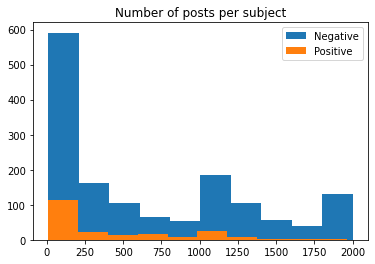

In [66]:
num_neg_posts = [len(subject.posts) for subject in neg_subjects]
num_pos_posts = [len(subject.posts) for subject in pos_subjects]
fig, ax = plt.subplots()
ax.set_title("Number of posts per subject")
ax.hist(num_neg_posts, label="Negative")
ax.hist(num_pos_posts, label="Positive")
ax.legend()

Min: 0.0
Max: 39973.0


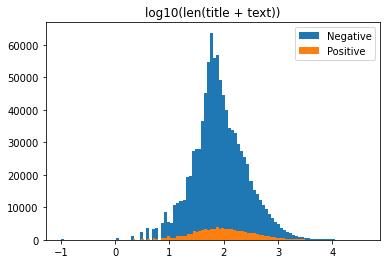

In [67]:
alpha = 0.1
neg_post_lens = [len(post.title + post.text) + alpha for subject in neg_subjects for post in subject.posts]
pos_post_lens = [len(post.title + post.text) + alpha for subject in pos_subjects for post in subject.posts]
fig, ax = plt.subplots()
ax.set_title("log10(len(title + text))")
ax.hist(np.log10(neg_post_lens), bins=100, label="Negative")
ax.hist(np.log10(pos_post_lens), bins=100, label="Positive")
ax.legend()
print("Min:", min(neg_post_lens + pos_post_lens) - alpha)
print("Max:", max(neg_post_lens + pos_post_lens) - alpha)

/tmp/ipykernel_356738/971433503.py:6: RuntimeWarning: invalid value encountered in log10
  ax.hist(np.log10(neg_post_intervals), bins=100, label="Negative")
/tmp/ipykernel_356738/971433503.py:7: RuntimeWarning: invalid value encountered in log10
  ax.hist(np.log10(pos_post_intervals), bins=100, label="Positive")


Shortest post history: 2:47:52
Longest post history: 3953 days, 10:14:55


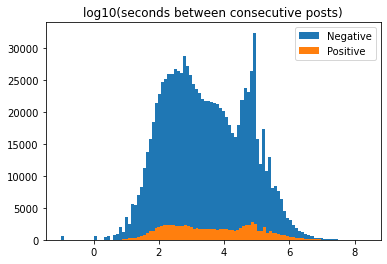

In [68]:
alpha = 0.1
neg_post_intervals = [(post1.date - post2.date).total_seconds() + alpha for subject in neg_subjects for post1, post2 in zip(subject.posts, subject.posts[1:])]
pos_post_intervals = [(post1.date - post2.date).total_seconds() + alpha for subject in pos_subjects for post1, post2 in zip(subject.posts, subject.posts[1:])]
fig, ax = plt.subplots()
ax.set_title("log10(seconds between consecutive posts)")
ax.hist(np.log10(neg_post_intervals), bins=100, label="Negative")
ax.hist(np.log10(pos_post_intervals), bins=100, label="Positive")
ax.legend()
print("Shortest post history:", min(subject.posts[0].date - subject.posts[-1].date for subject in all_subjects))
print("Longest post history:", max(subject.posts[0].date - subject.posts[-1].date for subject in all_subjects))